In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Data\Telco_Customer_Churn_Dataset .csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_total_charges = df['TotalCharges'].isnull().sum()
missing_total_charges

11

In [8]:
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

In [9]:
df['TotalCharges'].isnull().sum()

0

In [10]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [15]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [20]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [18]:
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [22]:
df.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [23]:
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [26]:
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})

In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [30]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [31]:
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0,'No phone service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [32]:
df.MultipleLines.value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [33]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [34]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [36]:
df.OnlineBackup.value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [38]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df['OnlineBackup']

0       1
1       0
2       1
3       0
4       0
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: OnlineBackup, Length: 7043, dtype: int64

In [39]:
df.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [40]:
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [41]:
df.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [42]:
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [43]:
df.StreamingTV.value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [44]:
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [45]:
df.StreamingMovies.value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [46]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0,'No internet service':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [47]:
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [61]:
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1,0,1,0,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False
1,0,0,0,34,1,0,DSL,1,0,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,False,True
2,0,0,0,2,1,0,DSL,1,1,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,False,True
3,0,0,0,45,0,0,DSL,1,0,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,False,True
4,0,0,0,2,1,0,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,False,True
7039,0,1,1,72,1,1,Fiber optic,0,1,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,True,False
7040,0,1,1,11,0,0,DSL,1,0,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False
7041,1,1,0,4,1,1,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,False,True


In [66]:
bool_columns = ['gender_Female', 'gender_Male']

df2[bool_columns] = df2[bool_columns].astype(int)

df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1,0,1,0,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,0,0,0,34,1,0,DSL,1,0,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,0,1
2,0,0,0,2,1,0,DSL,1,1,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,1
3,0,0,0,45,0,0,DSL,1,0,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1
4,0,0,0,2,1,0,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,0,1
7039,0,1,1,72,1,1,Fiber optic,0,1,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,1,0
7040,0,1,1,11,0,0,DSL,1,0,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0
7041,1,1,0,4,1,1,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [70]:
df.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [72]:
df2 = pd.get_dummies(df2, columns=['InternetService'])
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,1,Electronic check,29.85,29.85,0,1,0,True,False,False
1,0,0,0,34,1,0,1,0,1,0,...,0,Mailed check,56.95,1889.50,0,0,1,True,False,False
2,0,0,0,2,1,0,1,1,0,0,...,1,Mailed check,53.85,108.15,1,0,1,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,0,Bank transfer (automatic),42.30,1840.75,0,0,1,True,False,False
4,0,0,0,2,1,0,0,0,0,0,...,1,Electronic check,70.70,151.65,1,1,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,Mailed check,84.80,1990.50,0,0,1,True,False,False
7039,0,1,1,72,1,1,0,1,1,0,...,1,Credit card (automatic),103.20,7362.90,0,1,0,False,True,False
7040,0,1,1,11,0,0,1,0,0,0,...,1,Electronic check,29.60,346.45,0,1,0,True,False,False
7041,1,1,0,4,1,1,0,0,0,0,...,1,Mailed check,74.40,306.60,1,0,1,False,True,False


In [73]:
bool_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']

df2[bool_columns] = df2[bool_columns].astype(int)

df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,1,Electronic check,29.85,29.85,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,0,Mailed check,56.95,1889.50,0,0,1,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,1,Mailed check,53.85,108.15,1,0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,0,Bank transfer (automatic),42.30,1840.75,0,0,1,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,1,Electronic check,70.70,151.65,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,Mailed check,84.80,1990.50,0,0,1,1,0,0
7039,0,1,1,72,1,1,0,1,1,0,...,1,Credit card (automatic),103.20,7362.90,0,1,0,0,1,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,Electronic check,29.60,346.45,0,1,0,1,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,1,Mailed check,74.40,306.60,1,0,1,0,1,0


In [74]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [75]:
df2 = pd.get_dummies(df2, columns=['PaymentMethod'])
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,1,0,0,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,1,0,0,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,0,0,1,1,0,0,True,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,0,1,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,1,1,0,0,False,False,False,True
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,False,True,False,False
7040,0,1,1,11,0,0,1,0,0,0,...,0,1,0,1,0,0,False,False,True,False
7041,1,1,0,4,1,1,0,0,0,0,...,1,0,1,0,1,0,False,False,False,True


In [76]:
bool_columns = ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df2[bool_columns] = df2[bool_columns].astype(int)

df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,1,1,0,0,0,0,0,1
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [78]:
df2.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [79]:
df2 = pd.get_dummies(df2, columns=['Contract'])
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,True,False,False
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,0,1,False,True,False
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,0,0,0,1,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,1,0,0,0,False,True,False
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,0,0,1,False,True,False
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,False,True,False
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,0,0,1,0,True,False,False
7041,1,1,0,4,1,1,0,0,0,0,...,0,1,0,0,0,0,1,True,False,False


In [81]:
bool_columns = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']

df2[bool_columns] = df2[bool_columns].astype(int)

df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

# Task 2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [85]:
customerDemographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
customerAccInfo = ['Contract', 'PaperlessBilling', 'PaymentMethod']
customerSpending = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [86]:
df[customerDemographic].describe()

,SeniorCitizen,Partner,Dependents
count,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588
std,0.368612,0.499748,0.458110
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [87]:
df[services].describe()

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903
std,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
df[customerAccInfo].describe()

,PaperlessBilling
count,7043.000000
mean,0.592219
std,0.491457
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


C:\Users\spand\AppData\Local\Temp\ipykernel_36216\1997043359.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\spand\AppData\Local\Temp\ipykernel_36216\1997043359.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


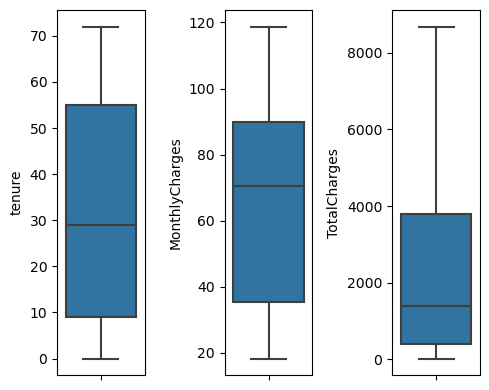

In [89]:
features = customerSpending
plt.figure(figsize=(5,4))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]])
  plt.tight_layout()

C:\Users\spand\AppData\Local\Temp\ipykernel_36216\97935324.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\spand\AppData\Local\Temp\ipykernel_36216\97935324.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


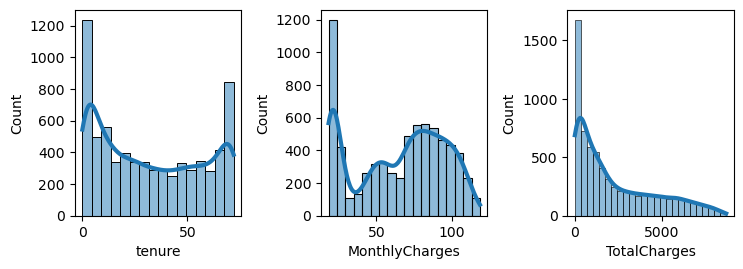

In [90]:
features = customerSpending
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.histplot(x=df[features[i]], kde=True, line_kws={'linewidth': 3})
  plt.xlabel(features[i])
  plt.tight_layout()

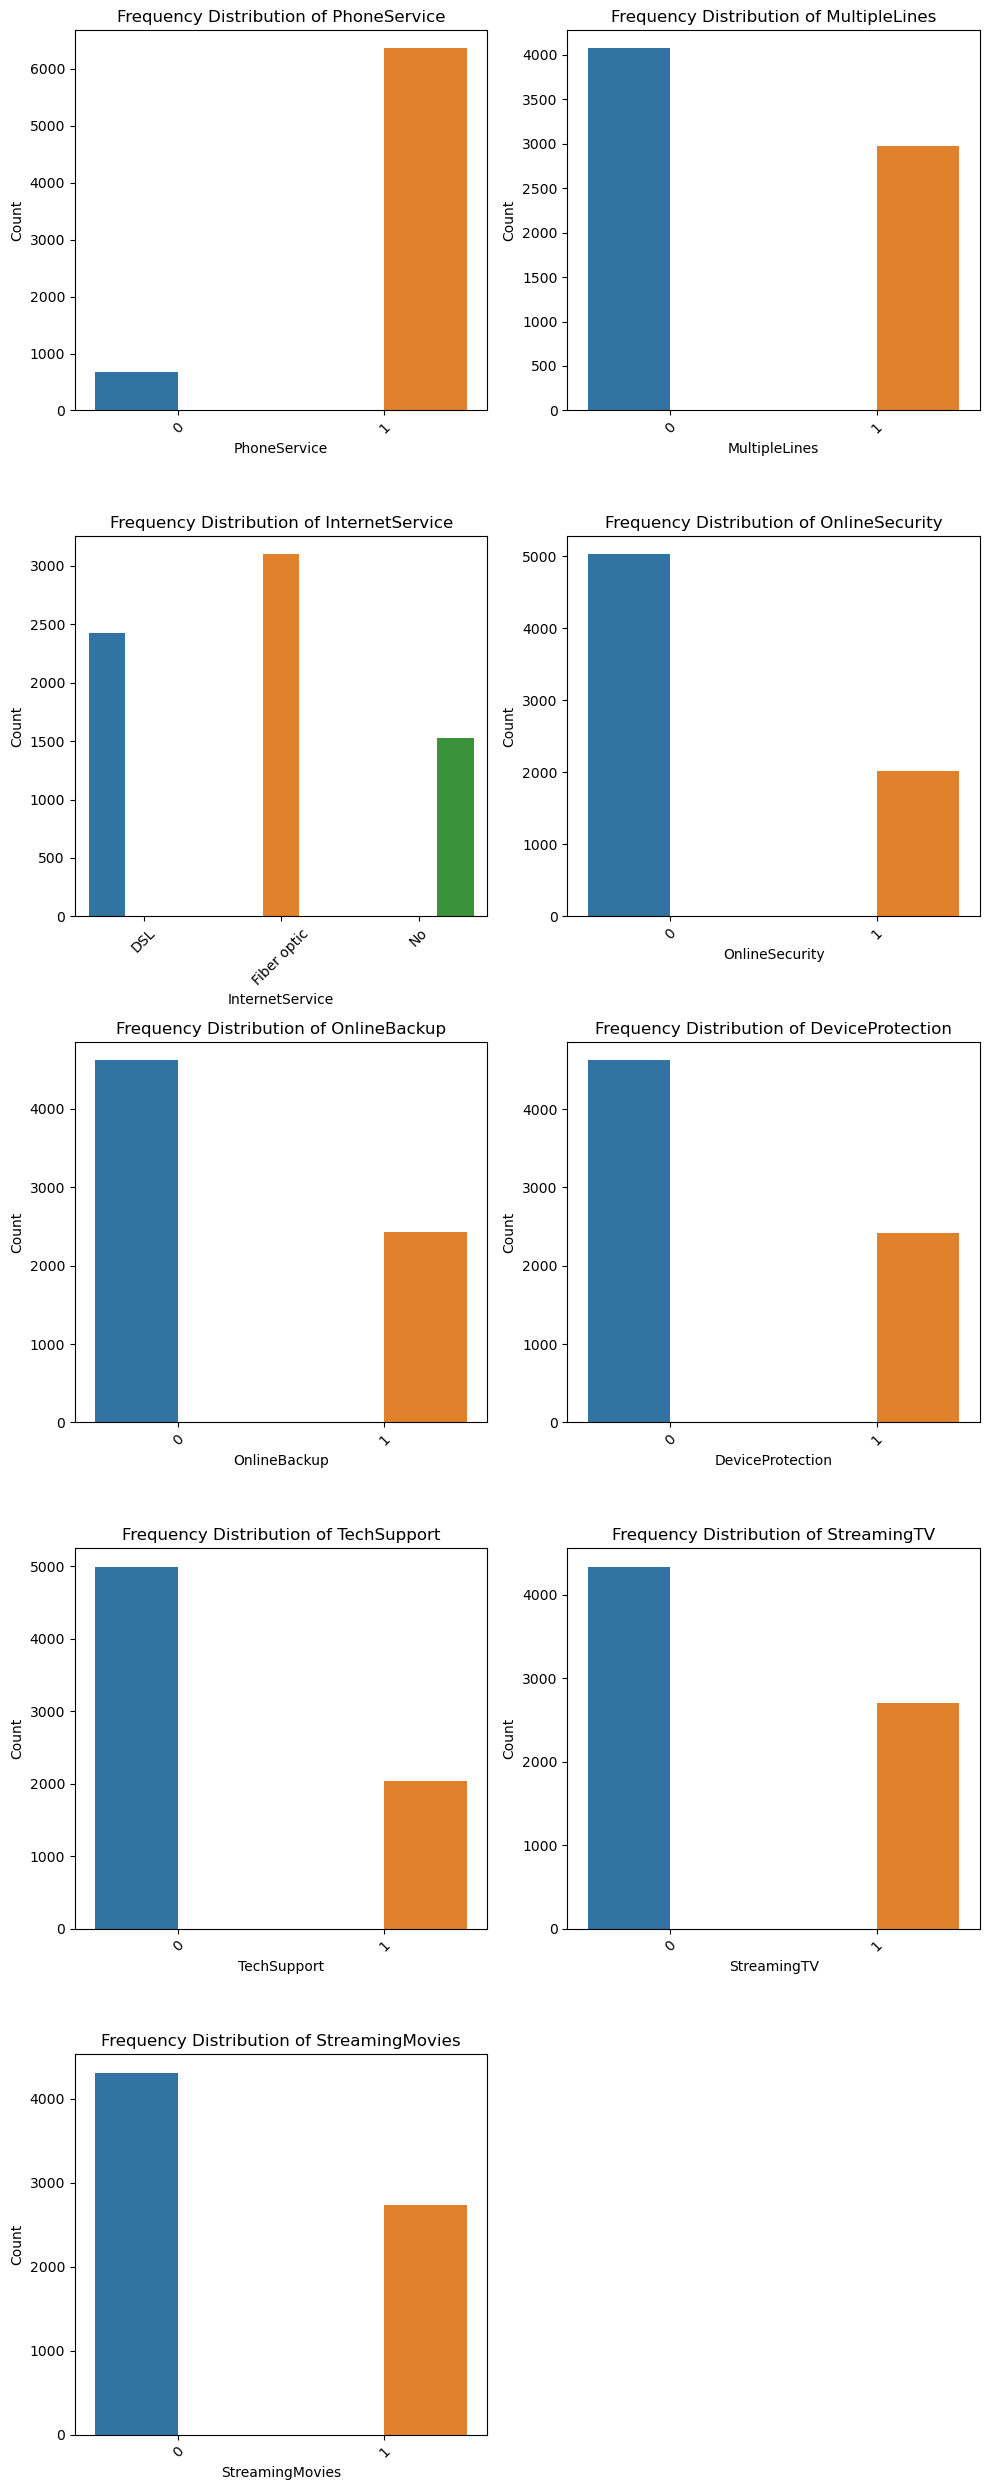

In [91]:
# Set up the subplot grid

num_rows = len(services) // 2 + len(services) % 2
plt.figure(figsize=(10, 5 * num_rows))

for i, col in enumerate(services, start=1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=col, hue=col, data=df)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend([], frameon=False)

plt.tight_layout()
plt.show()

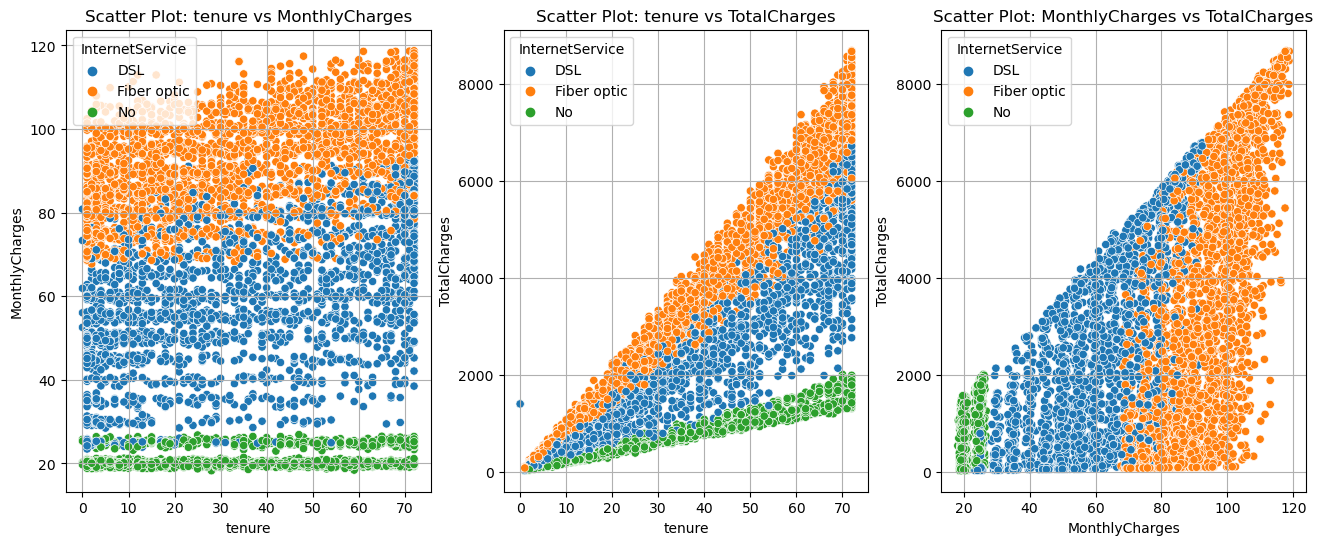

In [92]:
varTenure = 'tenure'
varMonthlyCharges = 'MonthlyCharges'
varTotalCharges = 'TotalCharges'
hue_var = 'InternetService'

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# tenure vs MonthlyCharges
sns.scatterplot(data=df, x=varTenure, y=varMonthlyCharges, hue=hue_var, ax=axes[0])
axes[0].set_title('Scatter Plot: ' + varTenure + ' vs ' + varMonthlyCharges)
axes[0].set_xlabel(varTenure)
axes[0].set_ylabel(varMonthlyCharges)
axes[0].grid(True)

# tenure vs TotalCharges
sns.scatterplot(data=df, x=varTenure, y=varTotalCharges, hue=hue_var, ax=axes[1])
axes[1].set_title('Scatter Plot: ' + varTenure + ' vs ' + varTotalCharges)
axes[1].set_xlabel(varTenure)
axes[1].set_ylabel(varTotalCharges)
axes[1].grid(True)

# MonthlyCharges vs TotalCharges
sns.scatterplot(data=df, x=varMonthlyCharges, y=varTotalCharges, hue=hue_var, ax=axes[2])
axes[2].set_title('Scatter Plot: ' + varMonthlyCharges + ' vs ' + varTotalCharges)
axes[2].set_xlabel(varMonthlyCharges)
axes[2].set_ylabel(varTotalCharges)
axes[2].grid(True)

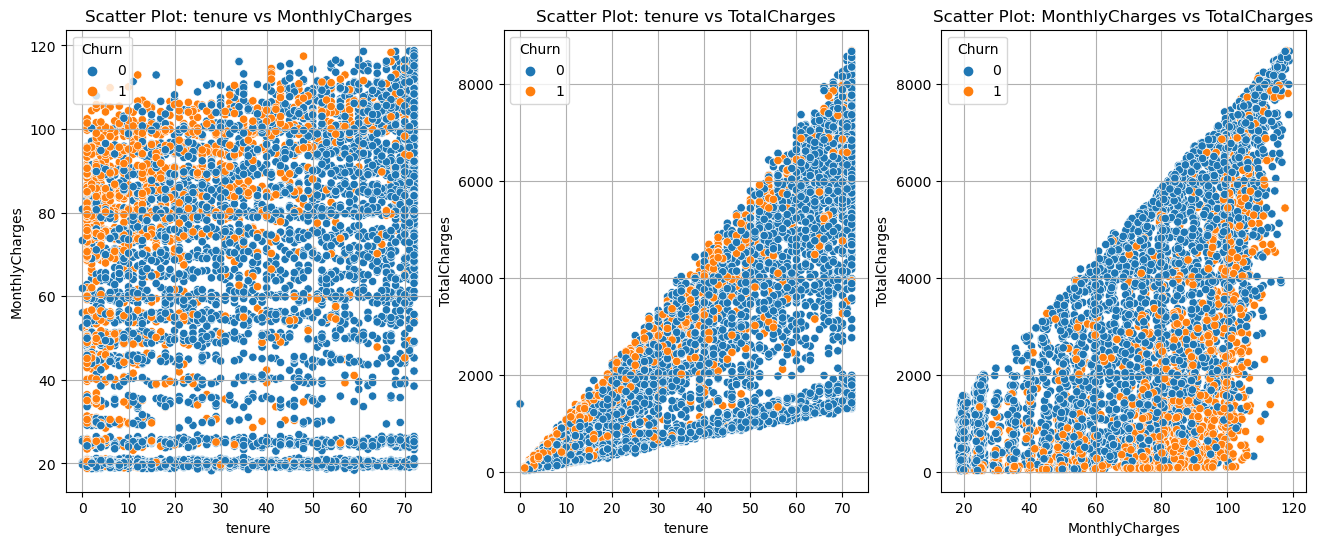

In [93]:
varTenure = 'tenure'
varMonthlyCharges = 'MonthlyCharges'
varTotalCharges = 'TotalCharges'
hue_var = 'Churn'

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# tenure vs MonthlyCharges
sns.scatterplot(data=df, x=varTenure, y=varMonthlyCharges, hue=hue_var, ax=axes[0])
axes[0].set_title('Scatter Plot: ' + varTenure + ' vs ' + varMonthlyCharges)
axes[0].set_xlabel(varTenure)
axes[0].set_ylabel(varMonthlyCharges)
axes[0].grid(True)

# tenure vs TotalCharges
sns.scatterplot(data=df, x=varTenure, y=varTotalCharges, hue=hue_var, ax=axes[1])
axes[1].set_title('Scatter Plot: ' + varTenure + ' vs ' + varTotalCharges)
axes[1].set_xlabel(varTenure)
axes[1].set_ylabel(varTotalCharges)
axes[1].grid(True)

# MonthlyCharges vs TotalCharges
sns.scatterplot(data=df, x=varMonthlyCharges, y=varTotalCharges, hue=hue_var, ax=axes[2])
axes[2].set_title('Scatter Plot: ' + varMonthlyCharges + ' vs ' + varTotalCharges)
axes[2].set_xlabel(varMonthlyCharges)
axes[2].set_ylabel(varTotalCharges)
axes[2].grid(True)

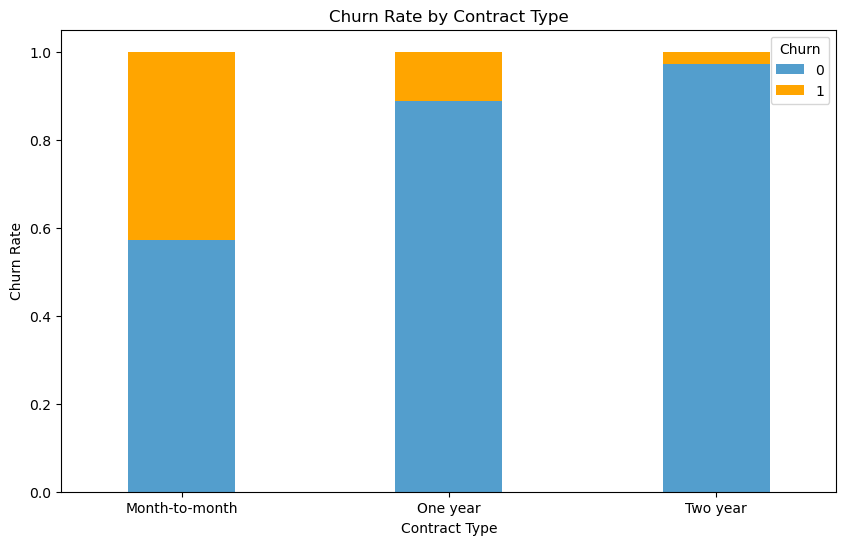

In [94]:
contract_churn_rate = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)

contract_churn_rate.plot(kind='bar', stacked=True, figsize=(10, 6), width = 0.4, color=['#539ecd', 'orange'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

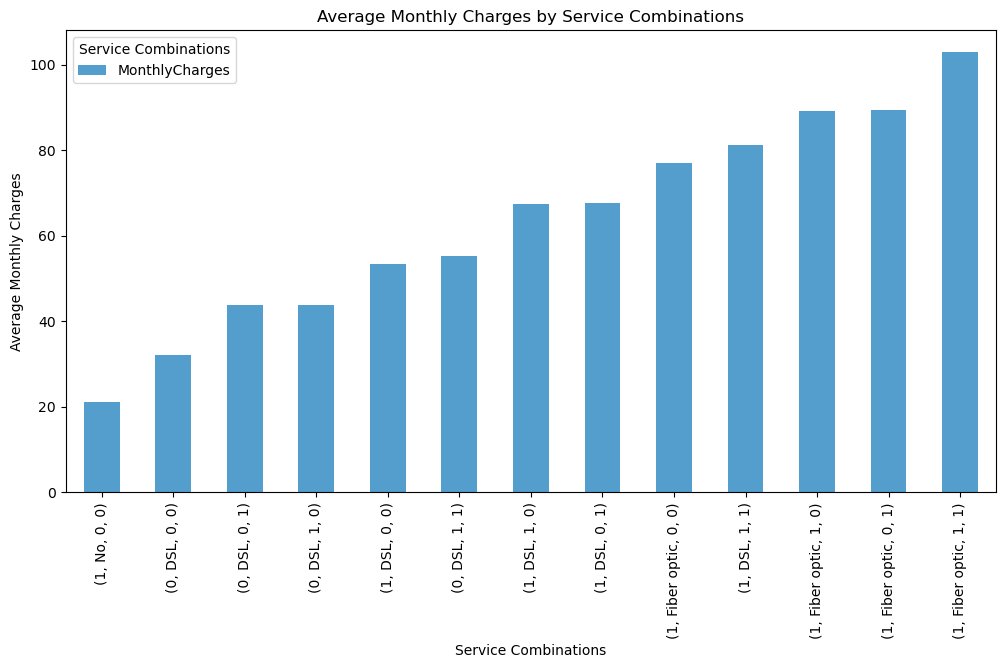

In [95]:
services = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']

# groupby
service_avg = df.groupby(services)['MonthlyCharges'].mean().sort_values()

# Plot the average monthly charges for each service combination
plt.figure(figsize=(12, 8))
service_avg.plot(kind='bar', figsize=(12, 6), color = ['#539ecd'])
plt.title('Average Monthly Charges by Service Combinations')
plt.xlabel('Service Combinations')
plt.ylabel('Average Monthly Charges')
plt.xticks(rotation=90)
plt.legend(title='Service Combinations', loc='upper left')
plt.show()

In [96]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [97]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
Streamin

In [98]:
#Train Test split
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [99]:
y_train.value_counts()

Churn
0.0    4139
1.0    1495
Name: count, dtype: int64

In [100]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [101]:
y_test.value_counts()

Churn
0.0    1035
1.0     374
Name: count, dtype: int64

In [102]:
X_train.shape

(5634, 27)

In [103]:
X_test.shape

(1409, 27)

In [104]:
X_train[:10]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6827,0,1,1,0.833333,1,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0
4146,0,1,0,0.486111,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2432,1,1,0,0.694444,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1029,1,1,1,0.041667,1,0,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
4216,0,0,0,1.000000,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3948,0,1,1,0.777778,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2642,0,1,0,0.652778,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3598,1,0,0,0.013889,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
6461,0,1,0,0.680556,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5534,0,0,1,0.291667,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [105]:
len(X_train.columns)

27

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [107]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

In [108]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7977288857345636 

preds [1. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

